In [226]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score, ConfusionMatrixDisplay

from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import  LogisticRegression

from sklearn.ensemble import  RandomForestClassifier

from sklearn.naive_bayes import GaussianNB


In [227]:
df = pd.read_csv('mobile.csv')
df

,index,battery_power,blue,clock_speed,sim type,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,type,wifi,price_range
0,0,842.0,no,2.2,one,1,no,7,0.6,188.0,...,20.0,756.0,2549.0,9.0,7.0,19.0,no,button,has wifi,medium low
1,1,1021.0,yes,0.5,dual,0,yes,53,0.7,136.0,...,905.0,1988.0,2631.0,17.0,3.0,7.0,yes,touch screen,no wifi,medium high
2,2,563.0,yes,0.5,dual,2,yes,41,0.9,145.0,...,1263.0,1716.0,2603.0,11.0,2.0,9.0,yes,touch screen,no wifi,medium high
3,3,615.0,yes,2.5,one,0,no,10,0.8,131.0,...,1216.0,1786.0,2769.0,16.0,8.0,11.0,yes,button,no wifi,medium high
4,4,1821.0,yes,1.2,one,13,yes,44,0.6,141.0,...,1208.0,1212.0,1411.0,8.0,2.0,15.0,yes,touch screen,no wifi,medium low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,794.0,yes,0.5,dual,0,yes,2,0.8,106.0,...,1222.0,1890.0,668.0,13.0,4.0,19.0,yes,touch screen,no wifi,low price
1996,1996,1965.0,yes,2.6,dual,0,no,39,0.2,187.0,...,915.0,1965.0,2032.0,11.0,10.0,16.0,yes,touch screen,has wifi,medium high
1997,1997,1911.0,no,0.9,dual,1,yes,36,0.7,108.0,...,868.0,1632.0,3057.0,9.0,1.0,5.0,yes,touch screen,no wifi,high
1998,1998,1512.0,no,0.9,one,4,yes,46,0.1,145.0,...,336.0,670.0,869.0,18.0,10.0,19.0,yes,touch screen,has wifi,low price


SHOW DATA FEATURE

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          2000 non-null   int64  
 1   battery_power  1996 non-null   float64
 2   blue           1998 non-null   object 
 3   clock_speed    1997 non-null   float64
 4   sim type       1999 non-null   object 
 5   fc             2000 non-null   int64  
 6   four_g         1996 non-null   object 
 7   int_memory     2000 non-null   int64  
 8   m_dep          1995 non-null   float64
 9   mobile_wt      1996 non-null   float64
 10  n_cores        1999 non-null   float64
 11  pc             1996 non-null   float64
 12  px_height      1998 non-null   float64
 13  px_width       1999 non-null   float64
 14  ram            1996 non-null   float64
 15  sc_h           1996 non-null   float64
 16  sc_w           1998 non-null   float64
 17  talk_time      1995 non-null   float64
 18  three_g 

In [229]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,2000.0,999.500000,577.494589,0.0,499.75,999.5,1499.25,1999.0
battery_power,1996.0,1238.523547,439.512413,501.0,851.75,1226.0,1615.25,1998.0
clock_speed,1997.0,1.522334,0.816085,0.5,0.70,1.5,2.20,3.0
fc,2000.0,4.309500,4.341444,0.0,1.00,3.0,7.00,19.0
int_memory,2000.0,32.046500,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,1995.0,0.502055,0.288514,0.1,0.20,0.5,0.80,1.0
mobile_wt,1996.0,140.265030,35.401066,80.0,109.00,141.0,170.00,200.0
n_cores,1999.0,4.519760,2.288170,1.0,3.00,4.0,7.00,8.0
pc,1996.0,9.922846,6.064404,0.0,5.00,10.0,15.00,20.0
px_height,1998.0,645.181181,443.638043,0.0,283.25,564.0,946.75,1960.0


for show in scater plot based on price range ,first have to convet to numeric

In [230]:
df['price_range'].replace({'low price' : 0,'medium low' : 1 , 'medium high' : 2,'high' : 3}, inplace=True)


Text(0, 0.5, 'value')

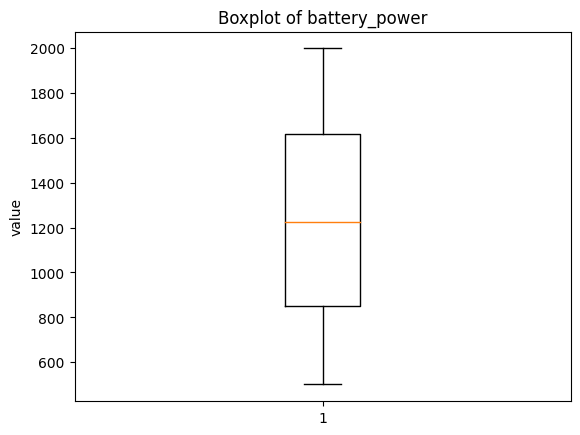

In [231]:
plt.boxplot(df['battery_power'].dropna())
plt.title('Boxplot of battery_power')
plt.ylabel('value')

Text(0, 0.5, 'value')

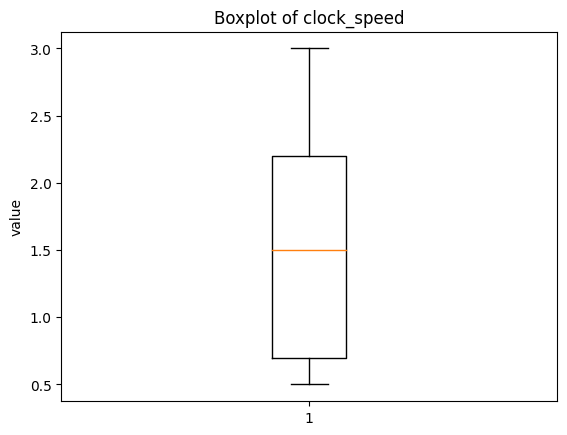

In [232]:
plt.boxplot(df['clock_speed'].dropna())
plt.title('Boxplot of clock_speed')
plt.ylabel('value')

Text(0, 0.5, 'value')

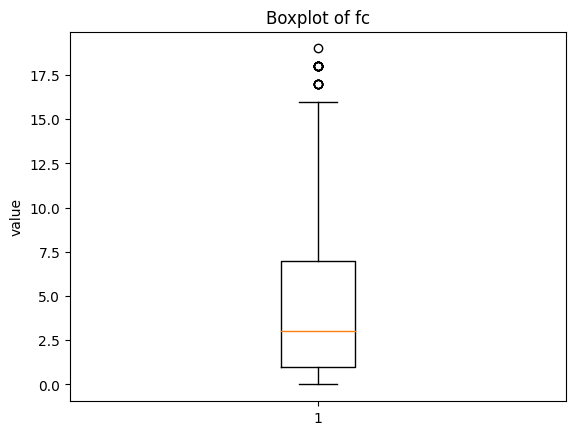

In [233]:
plt.boxplot(df['fc'].dropna())
plt.title('Boxplot of fc')
plt.ylabel('value')

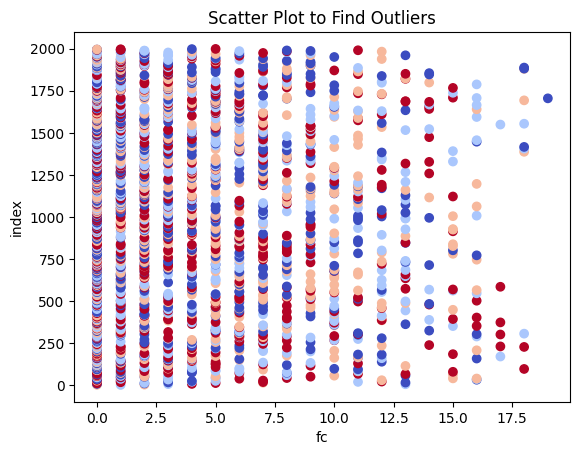

In [234]:
plt.title('Scatter Plot to Find Outliers')
plt.xlabel('fc')
plt.ylabel('index')
plt.scatter(df['fc'], df['index'], c = df['price_range'], cmap='coolwarm')
#plt.grid()
plt.show()

Text(0, 0.5, 'value')

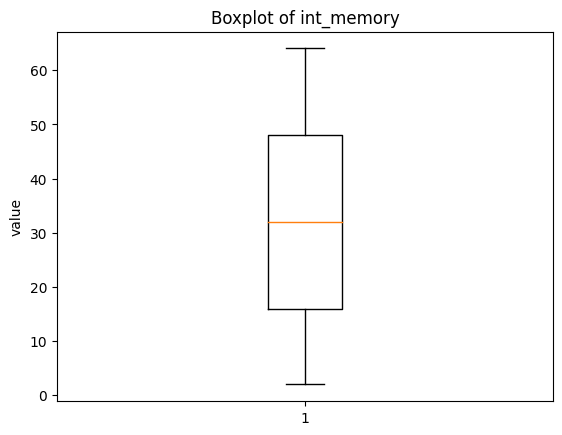

In [235]:
plt.boxplot(df['int_memory'].dropna())
plt.title('Boxplot of int_memory')
plt.ylabel('value')

Text(0, 0.5, 'value')

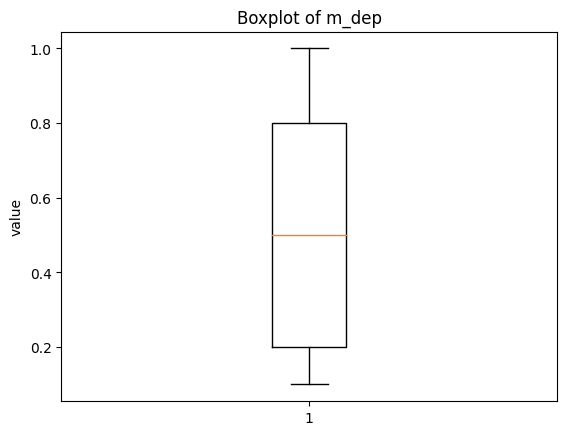

In [236]:
plt.boxplot(df['m_dep'].dropna())
plt.title('Boxplot of m_dep')
plt.ylabel('value')

Text(0, 0.5, 'value')

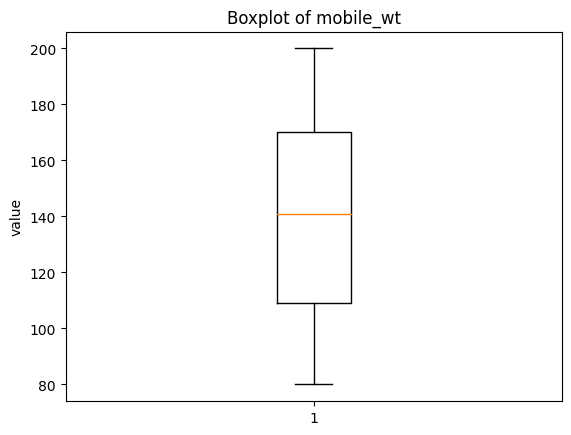

In [237]:
plt.boxplot(df['mobile_wt'].dropna())
plt.title('Boxplot of mobile_wt')
plt.ylabel('value')

Text(0, 0.5, 'value')

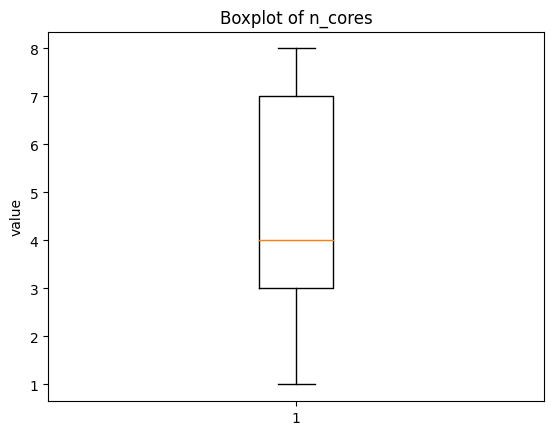

In [238]:
plt.boxplot(df['n_cores'].dropna())
plt.title('Boxplot of n_cores')
plt.ylabel('value')

Text(0, 0.5, 'value')

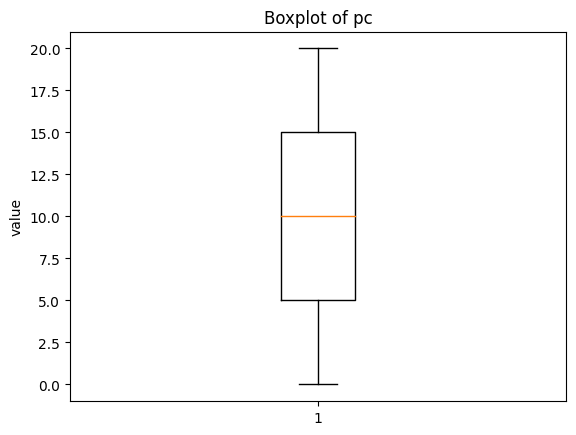

In [239]:
plt.boxplot(df['pc'].dropna())
plt.title('Boxplot of pc')
plt.ylabel('value')

Text(0, 0.5, 'value')

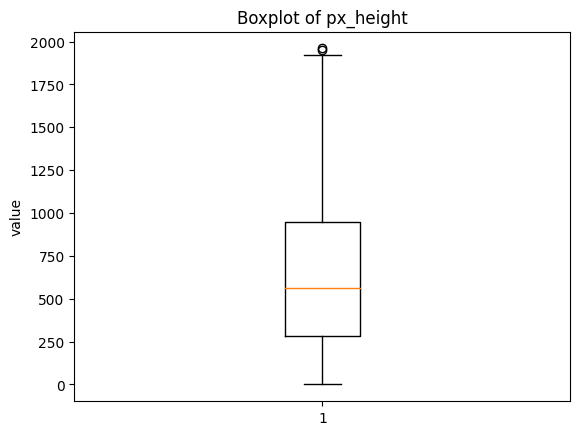

In [240]:
plt.boxplot(df['px_height'].dropna())
plt.title('Boxplot of px_height')
plt.ylabel('value')

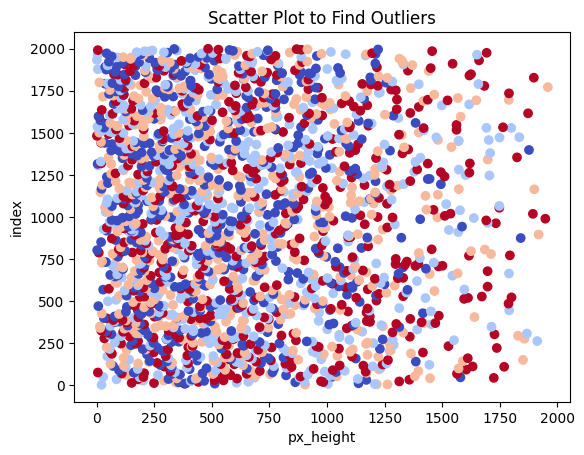

In [241]:
plt.title('Scatter Plot to Find Outliers')
plt.xlabel('px_height')
plt.ylabel('index')
plt.scatter(df['px_height'], df['index'], c = df['price_range'], cmap='coolwarm')
#plt.grid()
plt.show()

Text(0, 0.5, 'value')

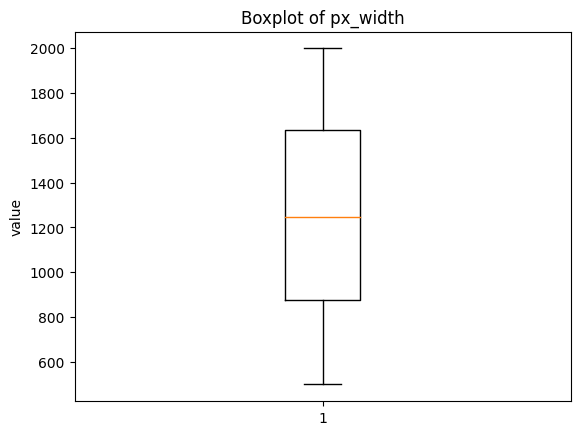

In [242]:
plt.boxplot(df['px_width'].dropna())
plt.title('Boxplot of px_width')
plt.ylabel('value')

Text(0, 0.5, 'value')

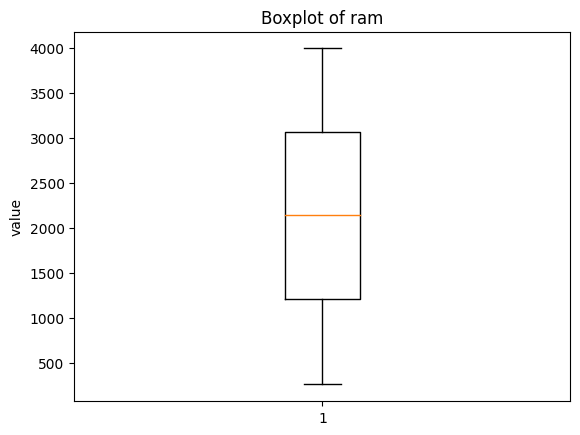

In [243]:
plt.boxplot(df['ram'].dropna())
plt.title('Boxplot of ram')
plt.ylabel('value')

Text(0, 0.5, 'value')

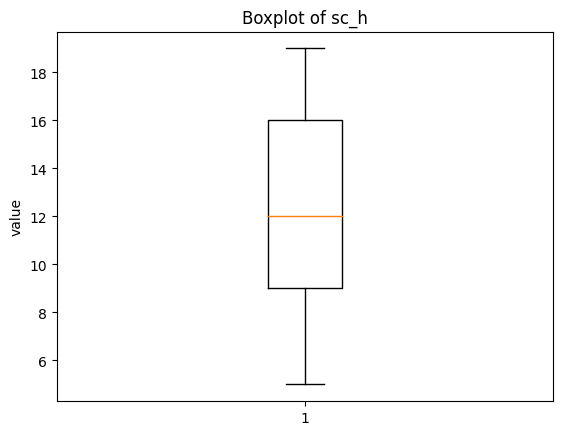

In [244]:
plt.boxplot(df['sc_h'].dropna())
plt.title('Boxplot of sc_h')
plt.ylabel('value')

Text(0, 0.5, 'value')

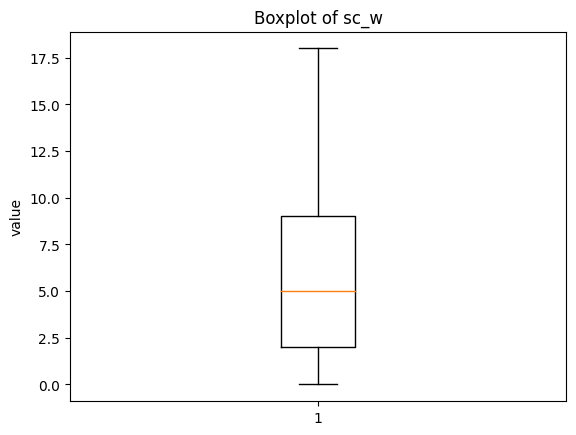

In [245]:
plt.boxplot(df['sc_w'].dropna())
plt.title('Boxplot of sc_w')
plt.ylabel('value')

Outlier Detection in all feeature

Text(0, 0.5, 'value')

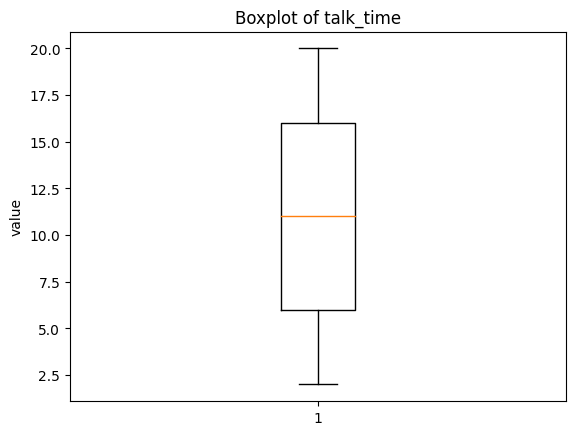

In [246]:
plt.boxplot(df['talk_time'].dropna())
plt.title('Boxplot of talk_time')
plt.ylabel('value')

Remove outlier of feature

In [247]:
df = df[df['fc'].between(0, 16) | pd.isna(df['fc'])]
df

,index,battery_power,blue,clock_speed,sim type,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,type,wifi,price_range
0,0,842.0,no,2.2,one,1,no,7,0.6,188.0,...,20.0,756.0,2549.0,9.0,7.0,19.0,no,button,has wifi,1
1,1,1021.0,yes,0.5,dual,0,yes,53,0.7,136.0,...,905.0,1988.0,2631.0,17.0,3.0,7.0,yes,touch screen,no wifi,2
2,2,563.0,yes,0.5,dual,2,yes,41,0.9,145.0,...,1263.0,1716.0,2603.0,11.0,2.0,9.0,yes,touch screen,no wifi,2
3,3,615.0,yes,2.5,one,0,no,10,0.8,131.0,...,1216.0,1786.0,2769.0,16.0,8.0,11.0,yes,button,no wifi,2
4,4,1821.0,yes,1.2,one,13,yes,44,0.6,141.0,...,1208.0,1212.0,1411.0,8.0,2.0,15.0,yes,touch screen,no wifi,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,794.0,yes,0.5,dual,0,yes,2,0.8,106.0,...,1222.0,1890.0,668.0,13.0,4.0,19.0,yes,touch screen,no wifi,0
1996,1996,1965.0,yes,2.6,dual,0,no,39,0.2,187.0,...,915.0,1965.0,2032.0,11.0,10.0,16.0,yes,touch screen,has wifi,2
1997,1997,1911.0,no,0.9,dual,1,yes,36,0.7,108.0,...,868.0,1632.0,3057.0,9.0,1.0,5.0,yes,touch screen,no wifi,3
1998,1998,1512.0,no,0.9,one,4,yes,46,0.1,145.0,...,336.0,670.0,869.0,18.0,10.0,19.0,yes,touch screen,has wifi,0


Text(0, 0.5, 'value')

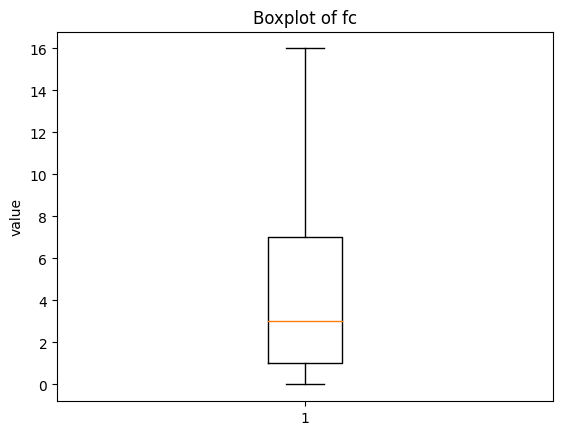

In [248]:
plt.boxplot(df['fc'].dropna())
plt.title('Boxplot of fc')
plt.ylabel('value')

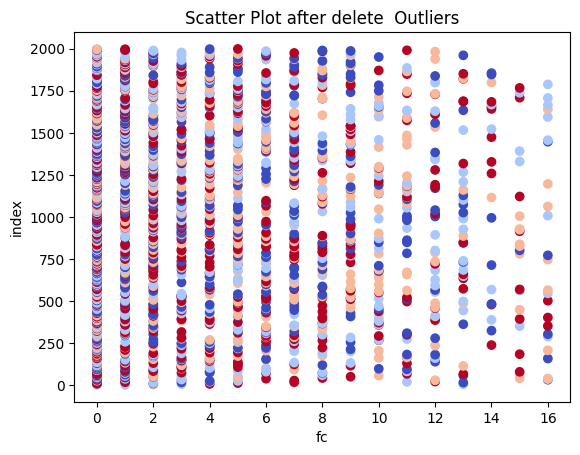

In [249]:
plt.title('Scatter Plot after delete  Outliers')
plt.xlabel('fc')
plt.ylabel('index')
plt.scatter(df['fc'], df['index'], c = df['price_range'], cmap='coolwarm')
#plt.grid()
plt.show()

In [250]:
df = df[df['px_height'].between(0, 1940) | pd.isna(df['px_height'])]
df

,index,battery_power,blue,clock_speed,sim type,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,type,wifi,price_range
0,0,842.0,no,2.2,one,1,no,7,0.6,188.0,...,20.0,756.0,2549.0,9.0,7.0,19.0,no,button,has wifi,1
1,1,1021.0,yes,0.5,dual,0,yes,53,0.7,136.0,...,905.0,1988.0,2631.0,17.0,3.0,7.0,yes,touch screen,no wifi,2
2,2,563.0,yes,0.5,dual,2,yes,41,0.9,145.0,...,1263.0,1716.0,2603.0,11.0,2.0,9.0,yes,touch screen,no wifi,2
3,3,615.0,yes,2.5,one,0,no,10,0.8,131.0,...,1216.0,1786.0,2769.0,16.0,8.0,11.0,yes,button,no wifi,2
4,4,1821.0,yes,1.2,one,13,yes,44,0.6,141.0,...,1208.0,1212.0,1411.0,8.0,2.0,15.0,yes,touch screen,no wifi,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,794.0,yes,0.5,dual,0,yes,2,0.8,106.0,...,1222.0,1890.0,668.0,13.0,4.0,19.0,yes,touch screen,no wifi,0
1996,1996,1965.0,yes,2.6,dual,0,no,39,0.2,187.0,...,915.0,1965.0,2032.0,11.0,10.0,16.0,yes,touch screen,has wifi,2
1997,1997,1911.0,no,0.9,dual,1,yes,36,0.7,108.0,...,868.0,1632.0,3057.0,9.0,1.0,5.0,yes,touch screen,no wifi,3
1998,1998,1512.0,no,0.9,one,4,yes,46,0.1,145.0,...,336.0,670.0,869.0,18.0,10.0,19.0,yes,touch screen,has wifi,0


Text(0, 0.5, 'value')

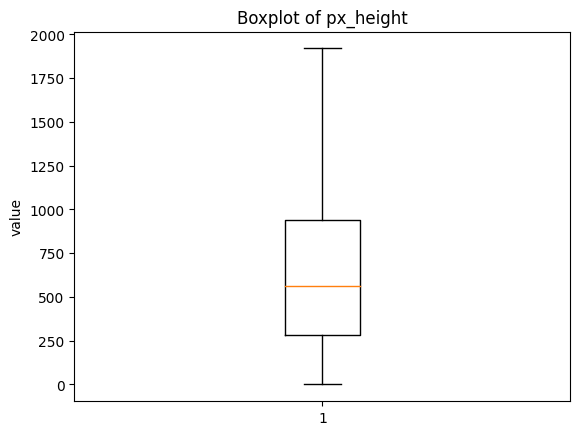

In [251]:
plt.boxplot(df['px_height'].dropna())
plt.title('Boxplot of px_height')
plt.ylabel('value')

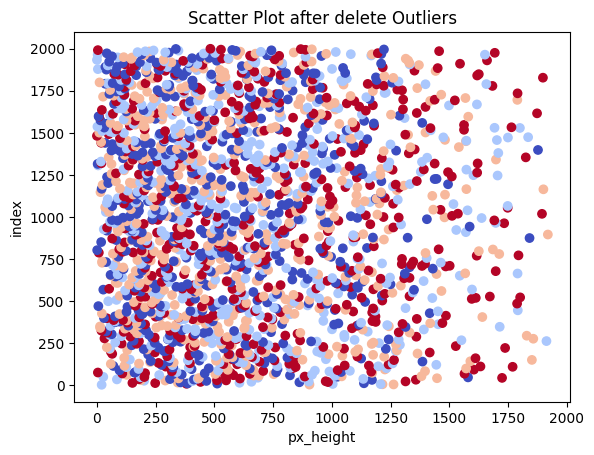

In [252]:
plt.title('Scatter Plot after delete Outliers')
plt.xlabel('px_height')
plt.ylabel('index')
plt.scatter(df['px_height'], df['index'], c = df['price_range'], cmap='coolwarm')
#plt.grid()
plt.show()

Check duplicated rows

NO duplicated!!

In [253]:
df[df.duplicated()]

,index,battery_power,blue,clock_speed,sim type,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,type,wifi,price_range


In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1980 entries, 0 to 1999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1980 non-null   int64  
 1   battery_power  1976 non-null   float64
 2   blue           1978 non-null   object 
 3   clock_speed    1977 non-null   float64
 4   sim type       1979 non-null   object 
 5   fc             1980 non-null   int64  
 6   four_g         1976 non-null   object 
 7   int_memory     1980 non-null   int64  
 8   m_dep          1975 non-null   float64
 9   mobile_wt      1976 non-null   float64
 10  n_cores        1979 non-null   float64
 11  pc             1976 non-null   float64
 12  px_height      1978 non-null   float64
 13  px_width       1979 non-null   float64
 14  ram            1976 non-null   float64
 15  sc_h           1976 non-null   float64
 16  sc_w           1978 non-null   float64
 17  talk_time      1975 non-null   float64
 18  three_g 

turn Categorical to Numeric

In [255]:
df['blue'].replace({'no' : 0,'yes' : 1 }, inplace=True)

df['sim type'].replace({'one' : 1,'dual' : 2 }, inplace=True)

df['four_g'].replace({'no' : 0,'yes' : 1 }, inplace=True)

df['three_g'].replace({'yes' : 1,'no' : 0 }, inplace=True)

df['type'].replace({'touch screen' :0,'button' :1}, inplace=True)


<ipython-input-255-34abdd61bd98>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['blue'].replace({'no' : 0,'yes' : 1 }, inplace=True)
<ipython-input-255-34abdd61bd98>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sim type'].replace({'one' : 1,'dual' : 2 }, inplace=True)
<ipython-input-255-34abdd61bd98>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['four_g'].replace({'no' : 0,'yes' : 1 }, inplace=True)
<ipython-input-25

In [256]:
df['wifi'].replace({'has wifi' : 1,'no wifi' : 0 }, inplace=True)
df

<ipython-input-256-0399f93d93c6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wifi'].replace({'has wifi' : 1,'no wifi' : 0 }, inplace=True)


,index,battery_power,blue,clock_speed,sim type,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,type,wifi,price_range
0,0,842.0,0.0,2.2,1.0,1,0.0,7,0.6,188.0,...,20.0,756.0,2549.0,9.0,7.0,19.0,0.0,1.0,1.0,1
1,1,1021.0,1.0,0.5,2.0,0,1.0,53,0.7,136.0,...,905.0,1988.0,2631.0,17.0,3.0,7.0,1.0,0.0,0.0,2
2,2,563.0,1.0,0.5,2.0,2,1.0,41,0.9,145.0,...,1263.0,1716.0,2603.0,11.0,2.0,9.0,1.0,0.0,0.0,2
3,3,615.0,1.0,2.5,1.0,0,0.0,10,0.8,131.0,...,1216.0,1786.0,2769.0,16.0,8.0,11.0,1.0,1.0,0.0,2
4,4,1821.0,1.0,1.2,1.0,13,1.0,44,0.6,141.0,...,1208.0,1212.0,1411.0,8.0,2.0,15.0,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,794.0,1.0,0.5,2.0,0,1.0,2,0.8,106.0,...,1222.0,1890.0,668.0,13.0,4.0,19.0,1.0,0.0,0.0,0
1996,1996,1965.0,1.0,2.6,2.0,0,0.0,39,0.2,187.0,...,915.0,1965.0,2032.0,11.0,10.0,16.0,1.0,0.0,1.0,2
1997,1997,1911.0,0.0,0.9,2.0,1,1.0,36,0.7,108.0,...,868.0,1632.0,3057.0,9.0,1.0,5.0,1.0,0.0,0.0,3
1998,1998,1512.0,0.0,0.9,1.0,4,1.0,46,0.1,145.0,...,336.0,670.0,869.0,18.0,10.0,19.0,1.0,0.0,1.0,0


In [ ]:
f3_median = df['battery_power'].median()
df['battery_power'] = df['battery_power'].fillna(f3_median)

f3_median = df['four_g'].median()
df['four_g'] = df['four_g'].fillna(f3_median)

f3_median = df['blue'].median()
df['blue'] = df['blue'].fillna(f3_median)

f3_median = df['clock_speed'].median()
df['clock_speed'] = df['clock_speed'].fillna(f3_median)

f3_median = df['sim type'].median()
df['sim type'] = df['sim type'].fillna(f3_median)

f3_median = df['m_dep'].median()
df['m_dep'] = df['m_dep'].fillna(f3_median)

f3_median = df['mobile_wt'].median()
df['mobile_wt'] = df['mobile_wt'].fillna(f3_median)

f3_median = df['n_cores'].median()
df['n_cores'] = df['n_cores'].fillna(f3_median)

f3_median = df['pc'].median()
df['pc'] = df['pc'].fillna(f3_median)

f3_median = df['px_height'].median()
df['px_height'] = df['px_height'].fillna(f3_median)

f3_median = df['px_width'].median()
df['px_width'] = df['px_width'].fillna(f3_median)

f3_median = df['ram'].median()
df['ram'] = df['ram'].fillna(f3_median)

f3_median = df['sc_h'].median()
df['sc_h'] = df['sc_h'].fillna(f3_median)

f3_median = df['sc_w'].median()
df['sc_w'] = df['sc_w'].fillna(f3_median)

f3_median = df['talk_time'].median()
df['talk_time'] = df['talk_time'].fillna(f3_median)

f4_median = df['three_g'].median()
df['three_g'] = df['three_g'].fillna(f4_median)

f4_median = df['type'].median()
df['type'] = df['type'].fillna(f4_median)

f4_median = df['wifi'].median()
df['wifi'] = df['wifi'].fillna(f4_median)

In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1980 entries, 0 to 1999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1980 non-null   int64  
 1   battery_power  1980 non-null   float64
 2   blue           1980 non-null   float64
 3   clock_speed    1980 non-null   float64
 4   sim type       1980 non-null   float64
 5   fc             1980 non-null   int64  
 6   four_g         1980 non-null   float64
 7   int_memory     1980 non-null   int64  
 8   m_dep          1980 non-null   float64
 9   mobile_wt      1980 non-null   float64
 10  n_cores        1980 non-null   float64
 11  pc             1980 non-null   float64
 12  px_height      1980 non-null   float64
 13  px_width       1980 non-null   float64
 14  ram            1980 non-null   float64
 15  sc_h           1980 non-null   float64
 16  sc_w           1980 non-null   float64
 17  talk_time      1980 non-null   float64
 18  three_g 

Split Train AND Test


In [259]:
X = df.drop(columns=['price_range', 'index'])
X

,battery_power,blue,clock_speed,sim type,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,type,wifi
0,842.0,0.0,2.2,1.0,1,0.0,7,0.6,188.0,2.0,2.0,20.0,756.0,2549.0,9.0,7.0,19.0,0.0,1.0,1.0
1,1021.0,1.0,0.5,2.0,0,1.0,53,0.7,136.0,3.0,6.0,905.0,1988.0,2631.0,17.0,3.0,7.0,1.0,0.0,0.0
2,563.0,1.0,0.5,2.0,2,1.0,41,0.9,145.0,5.0,6.0,1263.0,1716.0,2603.0,11.0,2.0,9.0,1.0,0.0,0.0
3,615.0,1.0,2.5,1.0,0,0.0,10,0.8,131.0,6.0,9.0,1216.0,1786.0,2769.0,16.0,8.0,11.0,1.0,1.0,0.0
4,1821.0,1.0,1.2,1.0,13,1.0,44,0.6,141.0,2.0,14.0,1208.0,1212.0,1411.0,8.0,2.0,15.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794.0,1.0,0.5,2.0,0,1.0,2,0.8,106.0,6.0,14.0,1222.0,1890.0,668.0,13.0,4.0,19.0,1.0,0.0,0.0
1996,1965.0,1.0,2.6,2.0,0,0.0,39,0.2,187.0,4.0,3.0,915.0,1965.0,2032.0,11.0,10.0,16.0,1.0,0.0,1.0
1997,1911.0,0.0,0.9,2.0,1,1.0,36,0.7,108.0,8.0,3.0,868.0,1632.0,3057.0,9.0,1.0,5.0,1.0,0.0,0.0
1998,1512.0,0.0,0.9,1.0,4,1.0,46,0.1,145.0,5.0,5.0,336.0,670.0,869.0,18.0,10.0,19.0,1.0,0.0,1.0


In [260]:
y = df['price_range']
y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 1980, dtype: int64

In [261]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [262]:
print('X shape: ', X.shape)
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print()
print('y shape:', y.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

X shape:  (1980, 20)
X_train shape:  (1782, 20)
X_test shape:  (198, 20)

y shape: (1980,)
y_train shape:  (1782,)
y_test shape:  (198,)


Scale numbers to between 0/1

In [263]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [264]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.104876,1.0,0.88,0.0,0.0000,1.0,0.161290,0.888889,0.191667,0.857143,0.15,0.602083,0.834446,0.890166,0.642857,0.611111,1.000000,1.0,1.0,0.0
1,0.522378,1.0,0.44,1.0,0.2500,0.0,0.725806,0.888889,0.108333,0.571429,0.25,0.193750,0.128171,0.652592,0.285714,0.333333,0.833333,1.0,0.0,0.0
2,0.951904,1.0,0.48,1.0,0.0625,1.0,0.500000,0.333333,0.766667,0.285714,0.10,0.511458,0.438585,0.596472,0.071429,0.055556,0.666667,1.0,1.0,0.0
3,0.075484,0.0,0.96,1.0,0.1875,1.0,0.354839,0.111111,0.116667,0.428571,0.35,0.213021,0.068758,0.447354,0.571429,0.666667,0.111111,1.0,1.0,1.0
4,0.887108,0.0,0.48,0.0,0.0000,0.0,0.548387,0.777778,0.266667,0.571429,0.05,0.151562,0.042056,0.325762,0.428571,0.222222,0.277778,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1777,0.625919,1.0,0.52,0.0,0.1875,0.0,0.225806,0.555556,0.741667,1.000000,0.35,0.447396,0.244993,0.531801,0.642857,0.611111,0.722222,0.0,1.0,0.0
1778,0.146961,0.0,0.00,1.0,0.3750,1.0,0.064516,0.333333,0.950000,0.428571,0.45,0.753125,0.993324,0.073223,0.214286,0.222222,0.333333,1.0,1.0,1.0
1779,0.979292,0.0,0.00,0.0,0.0000,1.0,0.709677,0.555556,0.991667,0.000000,0.35,0.269792,0.583445,0.350347,0.714286,0.111111,0.277778,1.0,0.0,0.0
1780,0.446894,1.0,0.28,0.0,0.2500,0.0,0.451613,0.333333,0.025000,1.000000,0.75,0.014063,0.815754,0.218332,0.071429,0.222222,0.333333,1.0,0.0,0.0


MODELS
DESICION TREE AND KNN

In [265]:
model = DecisionTreeClassifier(random_state=0)
model

DecisionTreeClassifier(random_state=0)

In [266]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [267]:
model.predict(X_test)

array([1, 0, 2, 3, 1, 3, 3, 3, 1, 1, 3, 3, 2, 2, 1, 2, 1, 0, 1, 3, 3, 3,
       3, 0, 3, 0, 3, 1, 0, 3, 1, 2, 3, 0, 3, 3, 3, 3, 2, 2, 0, 3, 3, 1,
       0, 3, 1, 1, 0, 3, 1, 0, 3, 2, 1, 1, 0, 2, 1, 3, 0, 1, 2, 0, 0, 3,
       1, 2, 2, 2, 0, 0, 3, 3, 0, 0, 3, 2, 0, 2, 1, 0, 0, 0, 1, 2, 2, 1,
       0, 0, 2, 3, 3, 2, 0, 1, 1, 3, 2, 1, 2, 2, 1, 0, 2, 1, 1, 3, 1, 1,
       2, 1, 1, 3, 1, 3, 3, 0, 3, 2, 0, 1, 1, 3, 0, 0, 3, 2, 3, 2, 0, 0,
       1, 0, 3, 3, 0, 2, 1, 1, 3, 1, 0, 0, 2, 2, 3, 3, 1, 0, 0, 0, 0, 1,
       0, 0, 3, 2, 3, 2, 3, 3, 3, 3, 3, 1, 0, 0, 3, 1, 3, 3, 2, 0, 2, 0,
       1, 0, 1, 3, 1, 0, 1, 0, 0, 3, 3, 3, 2, 2, 3, 1, 0, 0, 0, 1, 1, 3])

In [268]:
y_pred = model.predict(X_test)

In [269]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85        51
           1       0.69      0.74      0.72        46
           2       0.67      0.63      0.65        38
           3       0.90      0.86      0.88        63

    accuracy                           0.79       198
   macro avg       0.77      0.77      0.77       198
weighted avg       0.79      0.79      0.79       198



In [270]:
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred,average='micro'))
print('Recall: ', recall_score(y_test, y_pred,average='micro'))
print('F1-Score: ', f1_score(y_test, y_pred,average='micro'))

Accuracy:  0.7878787878787878
Precision:  0.7878787878787878
Recall:  0.7878787878787878
F1-Score:  0.7878787878787878


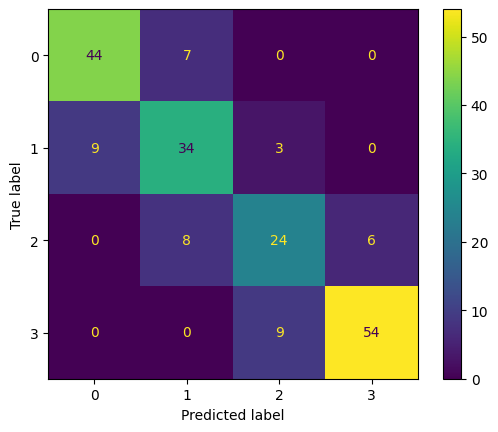

In [271]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [284]:
model = KNeighborsClassifier(n_neighbors=8)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.65      0.62        51
           1       0.30      0.35      0.32        46
           2       0.33      0.45      0.38        38
           3       0.62      0.37      0.46        63

    accuracy                           0.45       198
   macro avg       0.46      0.45      0.45       198
weighted avg       0.48      0.45      0.45       198



In [273]:
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred,average='micro'))
print('Recall: ', recall_score(y_test, y_pred,average='micro'))
print('F1-Score: ', f1_score(y_test, y_pred,average='micro'))

Accuracy:  0.4393939393939394
Precision:  0.4393939393939394
Recall:  0.4393939393939394
F1-Score:  0.4393939393939394


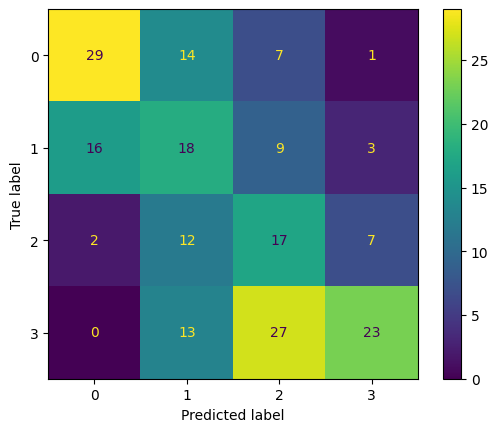

In [274]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [275]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        51
           1       0.87      0.85      0.86        46
           2       0.95      0.92      0.93        38
           3       0.97      1.00      0.98        63

    accuracy                           0.92       198
   macro avg       0.92      0.92      0.92       198
weighted avg       0.92      0.92      0.92       198



In [276]:
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred,average='micro'))
print('Recall: ', recall_score(y_test, y_pred,average='micro'))
print('F1-Score: ', f1_score(y_test, y_pred,average='micro'))

Accuracy:  0.9242424242424242
Precision:  0.9242424242424242
Recall:  0.9242424242424242
F1-Score:  0.9242424242424242


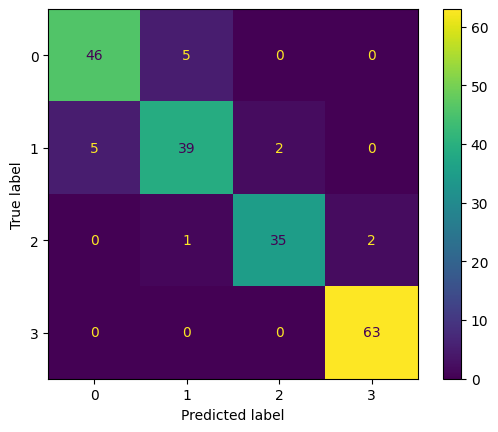

In [277]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [278]:
model = RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        51
           1       0.83      0.85      0.84        46
           2       0.78      0.84      0.81        38
           3       0.95      0.89      0.92        63

    accuracy                           0.87       198
   macro avg       0.87      0.87      0.87       198
weighted avg       0.88      0.87      0.87       198



In [279]:
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred,average='micro'))
print('Recall: ', recall_score(y_test, y_pred,average='micro'))
print('F1-Score: ', f1_score(y_test, y_pred,average='micro'))

Accuracy:  0.8737373737373737
Precision:  0.8737373737373737
Recall:  0.8737373737373737
F1-Score:  0.8737373737373737


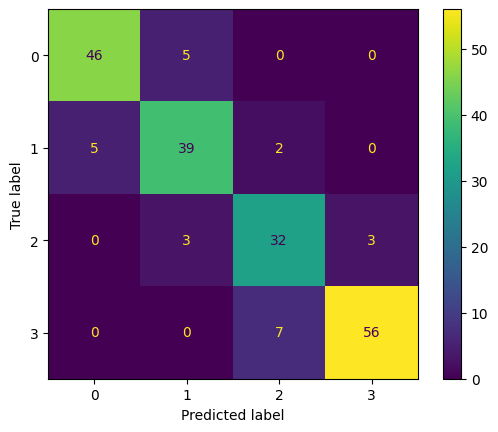

In [280]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [281]:
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.84      0.89        51
           1       0.71      0.76      0.74        46
           2       0.64      0.71      0.67        38
           3       0.92      0.89      0.90        63

    accuracy                           0.81       198
   macro avg       0.80      0.80      0.80       198
weighted avg       0.82      0.81      0.82       198



In [282]:
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred,average='micro'))
print('Recall: ', recall_score(y_test, y_pred,average='micro'))
print('F1-Score: ', f1_score(y_test, y_pred,average='micro'))

Accuracy:  0.8131313131313131
Precision:  0.8131313131313131
Recall:  0.8131313131313131
F1-Score:  0.8131313131313131


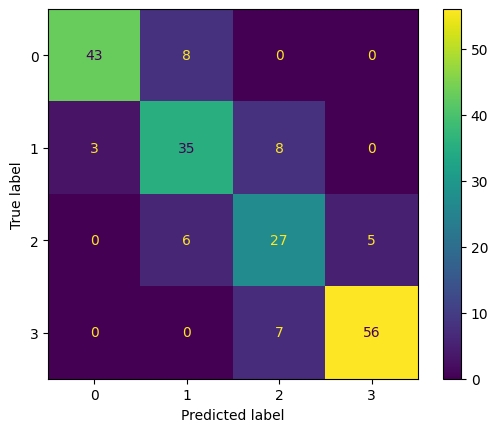

In [283]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)